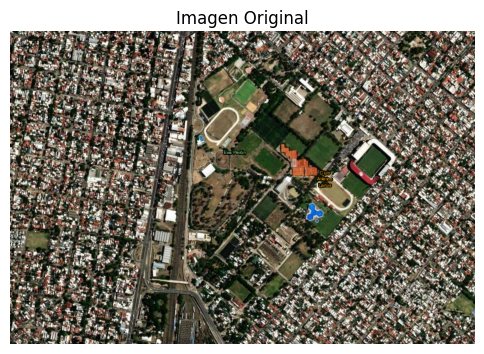

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en color
img = cv2.imread('lanus.png')

# Verificar si la imagen se ha cargado correctamente
if img is None:
    print("Error al cargar la imagen.")
    exit()

# Mostrar las imágenes en gráficos separados
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')
plt.show()

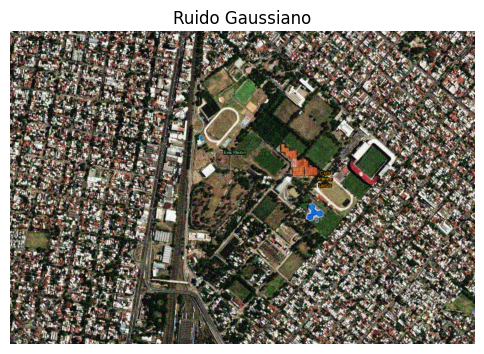

In [16]:
# Agregar ruido Gaussiano aditivo
def agregar_ruido_gaussiano(imagen, mean=0, var=0.01):
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, imagen.shape)
    imagen_ruido = imagen + gauss * 255
    imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)
    return imagen_ruido

imagen_ruido_gaussiano = agregar_ruido_gaussiano(img)
cv2.imwrite('imagen_ruido_gaussiano.png', imagen_ruido_gaussiano)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(imagen_ruido_gaussiano, cv2.COLOR_BGR2RGB))
plt.title('Ruido Gaussiano')
plt.axis('off')
plt.show()

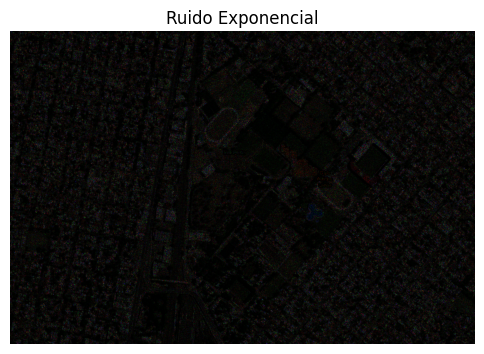

In [17]:
# Agregar ruido exponencial multiplicativo
def agregar_ruido_exponencial(imagen, scale=5):
    expo = np.random.exponential(scale, imagen.shape)
    imagen_ruido = imagen * expo
    imagen_ruido = imagen_ruido / np.max(imagen_ruido) * 255
    imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)
    return imagen_ruido

imagen_ruido_exponencial = agregar_ruido_exponencial(img)
cv2.imwrite('imagen_ruido_exponencial.png', imagen_ruido_exponencial)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(imagen_ruido_exponencial, cv2.COLOR_BGR2RGB))
plt.title('Ruido Exponencial')
plt.axis('off')
plt.show()

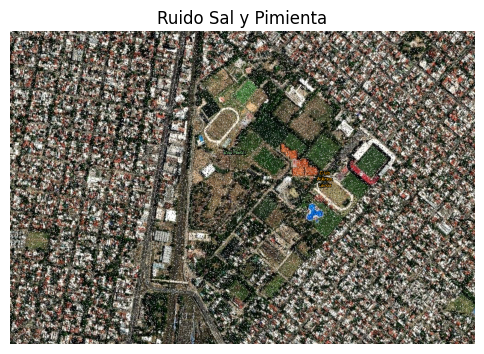

In [18]:
# Agregar ruido sal y pimienta
def agregar_ruido_sal_pimienta(imagen, prob=0.05):
    imagen_ruido = np.copy(imagen)
    num_salt = int(np.ceil(prob * imagen.size * 0.5))
    num_pepper = int(np.ceil(prob * imagen.size * 0.5))

    # Coordenadas de sal
    salt_coords = (np.random.randint(0, imagen.shape[0], num_salt),
                   np.random.randint(0, imagen.shape[1], num_salt))
    imagen_ruido[salt_coords] = [255, 255, 255]

    # Coordenadas de pimienta
    pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper),
                     np.random.randint(0, imagen.shape[1], num_pepper))
    imagen_ruido[pepper_coords] = [0, 0, 0]

    return imagen_ruido


imagen_ruido_sal_pimienta = agregar_ruido_sal_pimienta(img)
cv2.imwrite('imagen_ruido_sal_pimienta.png', imagen_ruido_sal_pimienta)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(imagen_ruido_sal_pimienta, cv2.COLOR_BGR2RGB))
plt.title('Ruido Sal y Pimienta')
plt.axis('off')
plt.show()